# Perceptron

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
import numpy as np
from numpy.random import binomial
#probability 0< f <= 0.5
f = 0.5

#number of neurons
N = 100

#Decision boundary (arbitrary and held constant)
T = 100

#Robustness
#Either defined with K, or with rho
"""
K = T/10
wAverage = T/(f*N)
# for different rescaled robustness parameters:
rho =K / (wAverage * np.sqrt(f*(1-f)*N))
"""
wAverage = T/(f*N)
rho = 1.
K = rho * wAverage * np.sqrt(f*(1-f)*N)

In [4]:
def generate_data(f, N, p=1):
    eta = binomial(1,f,(p,N))
    return(eta)

## Network storing fixed-point attractors

In [5]:
def testLearn(training_data, w):
    for mu in range(training_data.shape[0]):
        eta = training_data[mu,:].reshape((-1,1))
        result = dot(w,eta) - w.diagonal().reshape(-1,1) * eta
        if ((2*eta - 1)*(result - T) <= K).any():
            return False
    return True

Find maximal number of patterns which can be learned p_c.

We could try to find the critical capacity alpha_c = p/N analytically (alpha_c = H(B)/[f'H(tauMinus) + (1-f')H(tauPlus)]) as in [27] at http://www.cell.com/cms/attachment/572560/4239133/mmc1.pdf. We suppose f'=f

Besides, alpha_c -> 2 as N tends towards infinity.

In [122]:
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random
import numpy as np

training_data = generate_data(f, N)

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*T

while l_rate > T * 1e-6:
    iteration = 0
    converged = testLearn(training_data, w)
    while (not converged) and (iteration < 1e4):
        mu = random.randint(training_data.shape[0])
        eta = training_data[mu,:].reshape((-1,1))
        result = dot(w,eta) - w.diagonal().reshape(-1,1) * eta
        untrained = np.nonzero((2*eta - 1)*(result - T) <= K)
        DeltaW = l_rate * dot((2 * eta.reshape((-1,1)) - 1), eta.reshape((1,-1)))
        np.fill_diagonal(DeltaW,0)
        w[untrained,:] = np.add(w[untrained,:], DeltaW[untrained,:])
        w = (w>0) * w
        converged = testLearn(training_data, w)
        if iteration  % 1000 == 0:
            print(iteration)
        iteration += 1
        
    if converged:
        print("converged")
        #We have found p = 29 for our choice of parameters
        if training_data.shape[0]<29:
            training_data = np.vstack((training_data,generate_data(f,N)))
        else:
            break
            
    else:
        print("not")
        l_rate /= 2
    
    print(training_data.shape[0])

0
converged
2
0
converged
3
0
converged
4
0
converged
5
0
converged
6
0
converged
7
0
converged
8
0
converged
9
0
converged
10
0
converged
11
0
converged
12
0
converged
13
0
converged
14
0
converged
15
0
1000
2000
converged
16
0
converged
17
0
converged
18
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
not
18
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
not
18
0
1000
2000
3000
4000
converged
19
0
1000
2000
3000
converged
20
0
converged
21
0
1000
converged
22
0
1000
2000
converged
23
0
1000
converged
24
0
1000
converged
25
0
1000
2000
converged
26
0
1000
2000
3000
converged
27
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
not
27
0
1000
2000
3000
converged
28
0
1000
2000
3000
converged
29
0
1000
2000
3000
4000
5000
6000
converged


In [ ]:
#We can save the weights for a given training data.
np.save("w.npy", w)
np.save("training_data.npy", training_data)

In [ ]:
import numpy as np
w = np.load("w.npy")
training_data = np.load("training_data.npy")

## Network storing sequences

In [9]:
def testLearnSeq(training_data, w):
    for mu in range(training_data.shape[0]-1):
        etaMu = training_data[mu,:].reshape((-1,1))
        etaMu1 = training_data[mu+1,:].reshape((-1,1))
        result = dot(w,etaMu)
        if ((2*etaMu1 - 1)*(result - T) <= K).any():
            return False
    return True

In [10]:
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random
import numpy as np

training_data = generate_data(f,N,2)

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*T

while l_rate > T * 1e-6:
    iteration = 0
    converged = testLearn(training_data, w)
    while (not converged) and (iteration < 1e4):
        mu = random.randint(training_data.shape[0]-1)
        etaMu = training_data[mu,:].reshape((-1,1))
        etaMu1 = training_data[mu+1,:].reshape((-1,1))
        result = dot(w,etaMu)
        untrained = np.nonzero((2*etaMu1 - 1)*(result - T) <= K)
        DeltaW = l_rate * dot((2 * etaMu1.reshape((-1,1)) - 1), etaMu.reshape((1,-1)))
        w[untrained,:] = np.add(w[untrained,:], DeltaW[untrained,:])
        w = (w>0) * w
        converged = testLearnSeq(training_data, w)
        if iteration  % 1000 == 0:
            print(iteration)
        iteration += 1
        
    if converged:
        print("converged")
        training_data = np.vstack((training_data,generate_data(f,N)))
        
    else:
        print("not")
        l_rate /= 2
    
    print(training_data.shape[0])

0
converged
3
0
converged
4
0
converged
5
0
converged
6
0
converged
7
0
converged
8
0
converged
9
0
converged
10
0
converged
11
0
converged
12
0
converged
13
0
converged
14
0
converged
15
0
converged
16
0
converged
17
0
converged
18
0
converged
19
0
converged
20
0
converged
21
0
converged
22
0
1000
2000
converged
23
0
1000
converged
24
0
1000
2000
3000
4000
5000
6000
7000


KeyboardInterrupt: 

## Distribution of synaptic weights

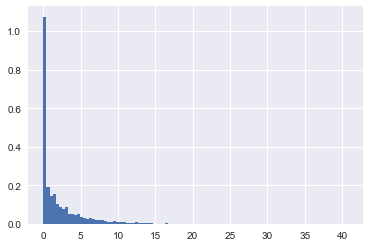

In [123]:
plt.hist(w.flatten(), bins = 100, normed = True)
plt.show()

In [124]:
# Figure 2.b
# distribution synaptic weights (histogram)

print(rho)
connectionProba = (w>0).sum()/(N*N)
print(connectionProba)

1.0
0.7284


## Statistics of two-neuron bidirectional connectivity

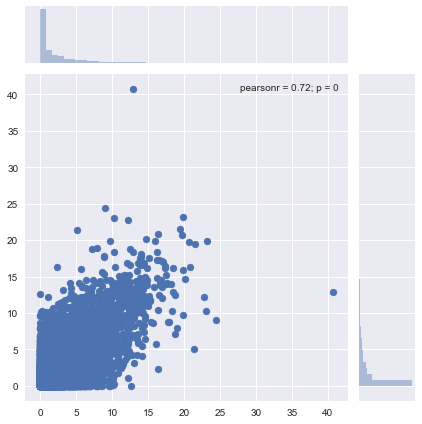

In [126]:
#Scatterplot of the pairs w_ij, w_ji

import seaborn as sns

sns.jointplot(w, w.T, kind = 'scatter')

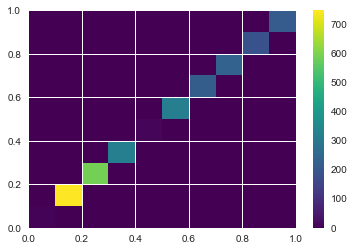

In [129]:
#histogram of the pairs w_ij, w_ji

plt.hist2d(w[w>0].ravel(), w[w>0].T.ravel(), bins = 10, range = np.array([[0,1],[0,1]]), cmap = 'viridis')
plt.colorbar()

In [130]:
#Construction of an erdos-renyi network.


import networkx

randomGraph = networkx.gnm_random_graph(N, (w>0).sum(), directed = True)


In [131]:
randomWeights = np.zeros((N,N))
for coordinate in randomGraph.edges():
    randomWeights[coordinate] = 1.

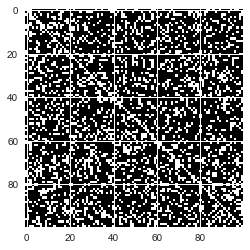

In [134]:
plt.imshow(randomWeights)

In [135]:
#Excess of reciprocally connected pairs compared to a random Erdos-Renyi network

countReciprocal = (w*w.T>0).sum()
countReciprocalER = (randomWeights*randomWeights.T>0).sum()
print(countReciprocal/countReciprocalER)

1.11081893313


In [139]:
#Reciprocal connection probability

reciprocalProba = countReciprocal/(N*N)
print(reciprocalProba)
#General connection probability
print(connectionProba)

0.5914
0.7284


## Degree distributions

In [137]:
Majorityness = []
for i in range(training_data.shape[1]):
    Majorityness.append(np.sum(training_data[:,i:i+1]*training_data)/(f*N*np.sum(training_data[:,i])))

In [138]:
Majorityness

[1.0306666666666666,
 1.023076923076923,
 1.0458823529411765,
 1.0725,
 1.0516666666666667,
 1.0600000000000001,
 1.0517647058823529,
 1.0349999999999999,
 1.0387500000000001,
 1.0611111111111111,
 1.0649999999999999,
 1.0453333333333332,
 1.02,
 1.0640000000000001,
 1.0338461538461539,
 1.063076923076923,
 1.0062500000000001,
 1.0816666666666668,
 1.0666666666666667,
 1.0346666666666666,
 1.0571428571428572,
 1.0628571428571429,
 1.0515789473684209,
 1.0418181818181818,
 1.0485714285714285,
 1.023076923076923,
 1.0261538461538462,
 1.0385714285714285,
 1.0283333333333333,
 1.06125,
 1.03,
 1.0533333333333332,
 1.0700000000000001,
 1.038,
 1.0553846153846154,
 1.0955555555555556,
 1.0589473684210526,
 1.056,
 1.0505882352941176,
 1.0076923076923077,
 1.0733333333333333,
 1.0729411764705883,
 1.02,
 1.0458823529411765,
 0.97999999999999998,
 1.0188235294117647,
 1.0700000000000001,
 1.0276923076923077,
 1.0647058823529412,
 1.0413333333333334,
 0.97999999999999998,
 1.028888888888889,
 

## Inhibition model

Model 1 : Linear

In [6]:
wInhib = 1.

In [8]:
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random
import numpy as np

training_data = generate_data(f,N)

w = random.uniform(0,2*T/(f*N),(N,N))
wEffective = w - wInhib * T / (f*N)
l_rate = 0.01*T

while l_rate > T * 1e-6:
    iteration = 0
    converged = testLearn(training_data, w)
    while (not converged) and (iteration < 1e4):
        mu = random.randint(training_data.shape[0])
        eta = training_data[mu,:].reshape((-1,1))
        result = dot(wEffective,eta) - wEffective.diagonal().reshape(-1,1) * eta
        untrained = np.nonzero((2*eta - 1)*(result - T) <= K)
        DeltaW = l_rate * dot((2 * eta.reshape((-1,1)) - 1), eta.reshape((1,-1)))
        np.fill_diagonal(DeltaW,0)
        w[untrained,:] = np.add(w[untrained,:], DeltaW[untrained,:])
        w = (w>0) * w
        wEffective = w - wInhib * T / (f*N)
        converged = testLearn(training_data, wEffective)
        if iteration  % 1000 == 0:
            print(iteration)
        iteration += 1
        
    if converged:
        print("converged")
        #We have found p = 29 for our choice of parameters
        if training_data.shape[0]<29:
            training_data = np.vstack((training_data,generate_data(f,N)))
        else:
            break
            
    else:
        print("not")
        l_rate /= 2
    
    print(training_data.shape[0])

0
converged
2
0
converged
3
0
converged
4
0
converged
5
0
converged
6
0
converged
7
0
converged
8
0
converged
9
0
converged
10
0
converged
11
0
converged
12
0
converged
13
0
converged
14
0
converged
15
0
converged
16
0
converged
17
0
converged
18
0
converged
19
0
converged
20
0
converged
21
0
converged
22
0
1000
converged
23
0
converged
24
0
converged
25
0
converged
26
0
1000
converged
27
0
1000
converged
28
0


KeyboardInterrupt: 

Model 2 : Individual inhibitory neurons

In [8]:
NI = int(N/4)
fI = 0.5

Variant 1 : all fixed

In [26]:
def testLearnI(training_data, inhibitory_data, w, wEI, wII, wIE):
    for mu in range(training_data.shape[0]):
        eta = training_data[mu,:].reshape((-1,1))
        etaI = inhibitory_data[mu,:].reshape((-1,1))
        result = dot(w,eta) - w.diagonal().reshape(-1,1) * eta
        result -= dot(wEI,etaI)      
        if ((2*eta - 1)*(result - T) <= K).any():
            return False
    return True

In [27]:
wEI = random.uniform(0,2 * (1 + wInhib) * T / (f*N),(N,NI))
wII = random.uniform(0,2 * wInhib * T / (fI*NI),(NI,NI))
wIE = random.uniform(0,2 * wInhib * T / (fI*NI),(NI,N))

In [30]:
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random
import numpy as np
training_data = generate_data(f,N)
inhibitory_data = generate_data(fI,NI)

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*T

while l_rate > T * 1e-6:
    iteration = 0
    converged = testLearn(training_data, w)
    while (not converged) and (iteration < 1e4):
        mu = random.randint(training_data.shape[0])
        eta = training_data[mu,:].reshape((-1,1))
        etaI = inhibitory_data[mu,:].reshape((-1,1))
        result = dot(w,eta) - w.diagonal().reshape(-1,1) * eta
        result -= dot(wEI,etaI)
        
        untrained = np.nonzero((2*eta - 1)*(result - T) <= K)
        
        DeltaW = l_rate * dot((2 * eta.reshape((-1,1)) - 1), eta.reshape((1,-1)))
        np.fill_diagonal(DeltaW,0)
        
        w[untrained,:] = np.add(w[untrained,:], DeltaW[untrained,:])
        w = (w>0) * w
        
        converged = testLearnI(training_data, inhibitory_data, w, wEI, wII, wIE)
        if iteration  % 1000 == 0:
            print(iteration)
        iteration += 1
        
    if converged:
        print("converged")
        #We have found p = 29 for our choice of parameters
        if training_data.shape[0]<29:
            training_data = np.vstack((training_data,generate_data(f,N)))
            inhibitory_data = np.vstack((inhibitory_data,generate_data(fI,NI)))
        else:
            break
            
    else:
        print("not")
        l_rate /= 2
    
    print(training_data.shape[0])

0
converged
2
0
converged
3
0
converged
4
0
converged
5
0
converged
6
0
converged
7
0
converged
8
0
converged
9
0
converged
10
0
converged
11
0
converged
12
0
converged
13
0
converged
14
0
converged
15
0
converged
16
0
converged
17
0
converged
18
0
converged
19
0
converged
20
0
converged
21
0
converged
22
0
1000
2000
3000
4000
5000
6000
converged
23
0
converged
24
0
1000
2000


KeyboardInterrupt: 

Variant 2 : Plastic IE

In [31]:
def testLearnI(training_data, inhibitory_data, w, wEI, wII, wIE):
    for mu in range(training_data.shape[0]):
        eta = training_data[mu,:].reshape((-1,1))
        etaI = inhibitory_data[mu,:].reshape((-1,1))
        result = dot(w,eta) - w.diagonal().reshape(-1,1) * eta
        result -= dot(wEI,etaI)
        
        resultI = dot(wIE,eta)
        resultI -= dot(wII,etaI) - wII.diagonal().reshape(-1,1) * etaI
        if ((2*eta - 1)*(result - T) <= K).any() and ((2*etaI - 1)*(resultI - T) <= K).any():
            return False
    return True

In [32]:
wEI = random.uniform(0,2 * (1 + wInhib) * T / (f*N),(N,NI))
wII = random.uniform(0,2 * wInhib * T / (fI*NI),(NI,NI))
wIE = random.uniform(0,2 * wInhib * T / (fI*NI),(NI,N))

#plastic IE

#Constraint of constant mean excitatory and inhibitory weights 

In [34]:
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random
import numpy as np
training_data = generate_data(f,N)
inhibitory_data = generate_data(fI,NI)

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*T

while l_rate > T * 1e-6:
    iteration = 0
    converged = testLearn(training_data, w)
    while (not converged) and (iteration < 1e4):
        mu = random.randint(training_data.shape[0])
        eta = training_data[mu,:].reshape((-1,1))
        etaI = inhibitory_data[mu,:].reshape((-1,1))
        result = dot(w,eta) - w.diagonal().reshape(-1,1) * eta
        result -= dot(wEI,etaI)
        
        resultI = dot(wIE,eta)
        resultI -= dot(wII,etaI) - wII.diagonal().reshape(-1,1) * etaI
        
        untrained = np.nonzero((2*eta - 1)*(result - T) <= K)
        untrainedI = np.nonzero((2*etaI - 1)*(resultI - T) <= K)
        
        DeltaW = l_rate * dot((2 * eta.reshape((-1,1)) - 1), eta.reshape((1,-1)))
        np.fill_diagonal(DeltaW,0)
        DeltaWIE = l_rate * dot((2 * etaI.reshape((-1,1)) - 1), eta.reshape((1,-1)))
        np.fill_diagonal(DeltaWIE,0)
        
        w[untrained,:] = np.add(w[untrained,:], DeltaW[untrained,:])
        w = (w>0) * w
        w = w / w.mean() * T/(f*N)
        
        wIE[untrainedI,:] = np.add(wIE[untrainedI,:], DeltaWIE[untrainedI,:])
        wIE = (wIE>0) * wIE
        wIE = wIE / wIE.mean() * wInhib * T / (fI*NI)
        
        converged = testLearnI(training_data, inhibitory_data, w, wEI, wII, wIE)
        if iteration  % 1000 == 0:
            print(iteration)
        iteration += 1
        
    if converged:
        print("converged")
        #We have found p = 29 for our choice of parameters
        if training_data.shape[0]<29:
            training_data = np.vstack((training_data,generate_data(f,N)))
            inhibitory_data = np.vstack((inhibitory_data,generate_data(fI,NI)))
        else:
            break
            
    else:
        print("not")
        l_rate /= 2
    
    print(training_data.shape[0])

0
converged
2
0
converged
3
0
converged
4
0
converged
5
0
converged
6
0
converged
7
0
1000
converged
8
0
1000
2000
3000
converged
9
0


KeyboardInterrupt: 

Variant 3 : All plastic

In [36]:
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/
# http://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

from random import choice
from numpy import array, dot, random
import numpy as np
training_data = generate_data(f,N)
inhibitory_data = generate_data(fI,NI)

w = random.uniform(0,2*T/(f*N),(N,N))
l_rate = 0.01*T

while l_rate > T * 1e-6:
    iteration = 0
    converged = testLearn(training_data, w)
    while (not converged) and (iteration < 1e4):
        mu = random.randint(training_data.shape[0])
        eta = training_data[mu,:].reshape((-1,1))
        etaI = inhibitory_data[mu,:].reshape((-1,1))
        result = dot(w,eta) - w.diagonal().reshape(-1,1) * eta
        result -= dot(wEI,etaI)
        
        resultI = dot(wIE,eta)
        resultI -= dot(wII,etaI) - wII.diagonal().reshape(-1,1) * etaI
        
        untrained = np.nonzero((2*eta - 1)*(result - T) <= K)
        untrainedI = np.nonzero((2*etaI - 1)*(resultI - T) <= K)
        
        DeltaW = l_rate * dot((2 * eta.reshape((-1,1)) - 1), eta.reshape((1,-1)))
        np.fill_diagonal(DeltaW,0)
        DeltaWIE = l_rate * dot((2 * etaI.reshape((-1,1)) - 1), eta.reshape((1,-1)))
        np.fill_diagonal(DeltaWIE,0)
        
        DeltaWEI = l_rate * dot((2 * eta.reshape((-1,1)) - 1), etaI.reshape((1,-1)))
        np.fill_diagonal(DeltaWEI,0)
        DeltaWII = l_rate * dot((2 * etaI.reshape((-1,1)) - 1), etaI.reshape((1,-1)))
        np.fill_diagonal(DeltaWII,0)
        
        w[untrained,:] = np.add(w[untrained,:], DeltaW[untrained,:])
        w = (w>0) * w
        w = w / w.mean() * T/(f*N)
        
        wIE[untrainedI,:] = np.add(wIE[untrainedI,:], DeltaWIE[untrainedI,:])
        wIE = (wIE>0) * wIE
        wIE = wIE / wIE.mean() * wInhib * T / (fI*NI)
        
        wEI[untrained,:] = np.add(wEI[untrained,:], DeltaWEI[untrained,:])
        wEI = (wEI>0) * wEI
        wEI = wEI / wEI.mean() * (1 + wInhib) * T / (f*N)
        
        wII[untrainedI,:] = np.add(wII[untrainedI,:], DeltaWII[untrainedI,:])
        wII = (wII>0) * wII
        wII = wII / wII.mean() * wInhib * T / (fI*NI)
        
        converged = testLearnI(training_data, inhibitory_data, w, wEI, wII, wIE)
        if iteration  % 1000 == 0:
            print(iteration)
        iteration += 1
        
    if converged:
        print("converged")
        #We have found p = 29 for our choice of parameters
        if training_data.shape[0]<29:
            training_data = np.vstack((training_data,generate_data(f,N)))
            inhibitory_data = np.vstack((inhibitory_data,generate_data(fI,NI)))
        else:
            break
            
    else:
        print("not")
        l_rate /= 2
    
    print(training_data.shape[0])

0
converged
2
0
converged
3
0
1000
2000
3000
4000
5000


KeyboardInterrupt: 